# Stock Analysis and Prediction

> ## Author = GOKUL B

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot as plt 

##  Data Preparation :

In [2]:
df = pd.read_csv("2 Year IBM Stock Data.csv")

In [3]:
df.head()

,time,open,high,low,close,volume
0,3/25/2022 19:19,131.300,131.30,131.300,131.30,718
1,3/25/2022 19:18,131.300,131.30,131.300,131.30,282
2,3/25/2022 17:50,131.300,131.30,131.300,131.30,100
3,3/25/2022 16:59,131.340,131.35,131.340,131.35,1427
4,3/25/2022 16:42,131.326,131.35,131.326,131.35,1326


- #### Check for missing Values :

In [4]:
df.isna().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

- #### Check for duplicates :

In [5]:
df.duplicated().sum()

0

## Data Exploration :

- #### Check relationships and column ditributions :

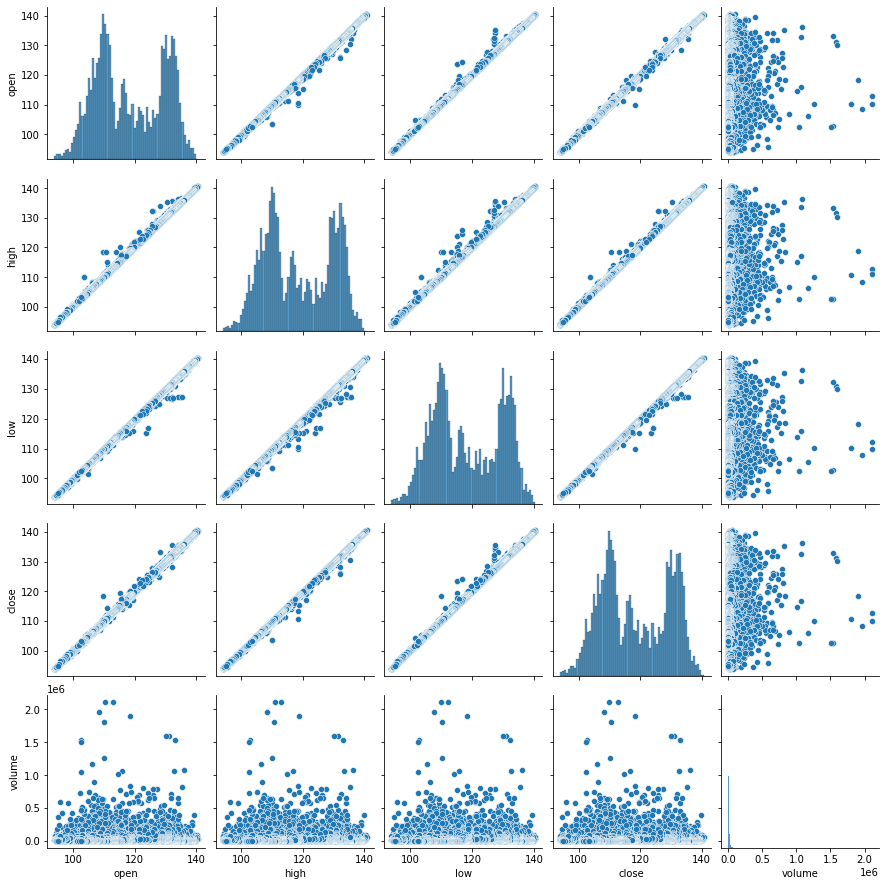

In [6]:
sns.pairplot(df);

- #### Check Correlation Between Variables :

In [7]:
df.corr()

,open,high,low,close,volume
open,1.000000,0.999976,0.999972,0.999972,-0.030462
high,0.999976,1.000000,0.999947,0.999978,-0.029033
low,0.999972,0.999947,1.000000,0.999971,-0.031974
close,0.999972,0.999978,0.999971,1.000000,-0.030500
volume,-0.030462,-0.029033,-0.031974,-0.030500,1.000000


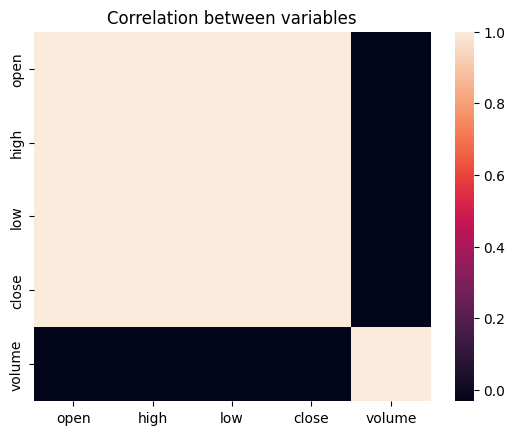

In [8]:
sns.heatmap(df.corr()).set(title ='Correlation between variables') ;

- > **There is a strong Correlation between the variables**

- #### Check For Outliers :

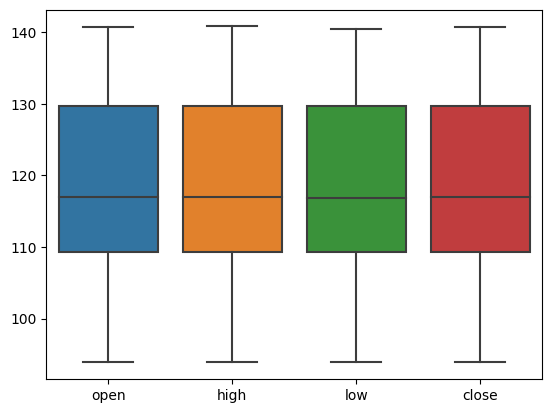

In [9]:
sns.boxplot(data = df.drop("volume" , axis = 1));

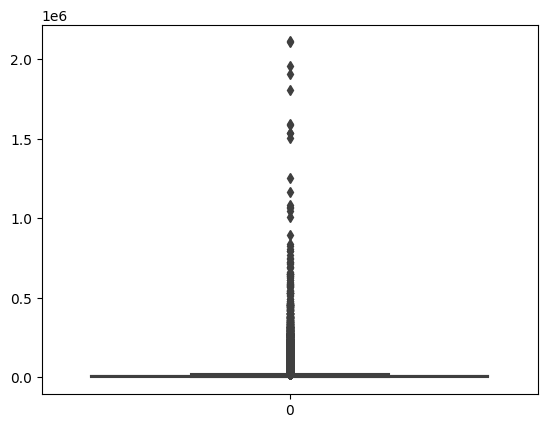

In [10]:
sns.boxplot(data = df.volume);

C:\Users\Subash Palvel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


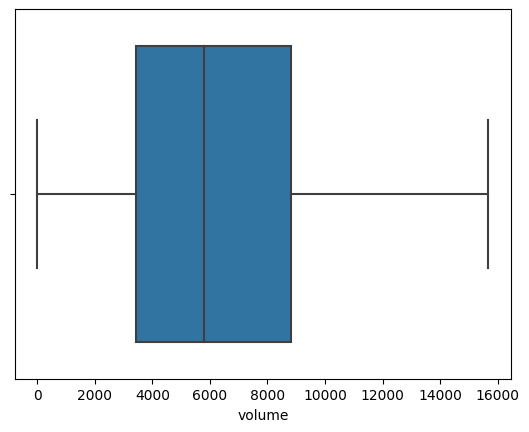

In [11]:
sns.boxplot(df[df.volume <( df.volume.quantile(0.25) + 1.5*(df.volume.quantile(0.75)-df.volume.quantile(0.25)))].volume);

## Preparing our Training and Testing datasets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df.drop(["high","time"] , axis = 1)
y = np.array(df.high).reshape(-1,1)

In [14]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y)

In [15]:
print(x_train.shape , y_train.shape)

(162662, 4) (162662, 1)


## Creating our model 

In [16]:
from sklearn.linear_model import LinearRegression 

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train ,y_train)

LinearRegression()

In [19]:
x_test.shape

(54221, 4)

In [20]:
y_pred = lr.predict(x_test)

## Testing Our model 

In [21]:
from sklearn.metrics import mean_squared_error  , r2_score,mean_absolute_error

In [22]:
print("R2 Score is : {:03f}".format(r2_score(y_test ,y_pred)))
print("Root Mean Squared Error is : {:03f}".format(mean_squared_error(y_test ,y_pred , squared = False)))
print("Mean Absolute Error is : {:03f}".format(mean_absolute_error(y_test ,y_pred)))

R2 Score is : 0.999958
Root Mean Squared Error is : 0.071441
Mean Absolute Error is : 0.023232
